In [1]:
%matplotlib widget

In [5]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
pd.options.mode.chained_assignment = None  # default='warn'

In [118]:
DATADIR = "data"
LCFILE = os.path.join(DATADIR, "plasticc_train_lightcurves.csv.gz")
LCS = pd.read_csv(LCFILE).set_index(["object_id"])

METAFILE = os.path.join(DATADIR, "plasticc_train_metadata.csv.gz")
META = pd.read_csv(METAFILE).set_index(["object_id"])

# source class id mapping
TARGET_MAP = {
    90: "SN1a",
    67: "SN1a-91bg",
    52: "SN1ax",
    42: "SN2",
    62: "SN1bc",
    95: "SLSN1",
    15: "TDE",
    64: "KN",
    88: "AGN",
    92: "RRL",
    65: "M-dwarf",
    16: "EB",
    53: "Mira",
    6: "Microlens",
}
TARGETS = pd.DataFrame.from_dict(TARGET_MAP, columns=["id"], orient="index")
TARGETS

,id
90,SN1a
67,SN1a-91bg
52,SN1ax
42,SN2
62,SN1bc
95,SLSN1
15,TDE
64,KN
88,AGN
92,RRL


In [126]:
META.head()

,ra,decl,ddf_bool,hostgal_specz,hostgal_photoz,hostgal_photoz_err,distmod,mwebv,target,true_target,...,true_rv,true_av,true_peakmjd,libid_cadence,tflux_u,tflux_g,tflux_r,tflux_i,tflux_z,tflux_y
object_id,,,,,,,,,,,,,,,,,,,,,
615,349.0461,-61.9438,1,0.000,0.000,0.000,-9.000,0.017,92,92,...,0.0,0.0,59570.000,69,484.7,3286.7,3214.1,3039.7,2854.5,2837.0
713,53.0859,-27.7844,1,1.818,1.627,0.255,45.406,0.007,88,88,...,0.0,0.0,59570.000,34,108.7,117.7,119.9,149.6,147.9,150.5
730,33.5742,-6.5796,1,0.232,0.226,0.016,40.256,0.021,42,42,...,0.0,0.0,60444.379,9,0.0,0.0,0.0,0.0,0.0,0.0
745,0.1899,-45.5867,1,0.304,0.281,1.152,40.795,0.007,90,90,...,0.0,0.0,60130.453,38,0.0,0.0,0.0,0.0,0.0,0.0
1124,352.7113,-63.8237,1,0.193,0.241,0.018,40.417,0.024,90,90,...,0.0,0.0,60452.641,1,0.0,0.0,0.0,0.0,0.0,0.0


In [119]:
def target_name(object_id):
    # match id
    print(META[META.index == object_id]["target"])
    t_id = META[META.index == object_id]["target"]
    t_name = TARGET_MAP[t_id]
    return t_name

In [120]:
df_meta_grpd_trgt = META.groupby(["target"])

In [125]:
dd_targets_train = dict()

print("Training sample:")
print(f"{'TARGET':<15} {'N':^10} {'%':^10}")
print("------------------------------------")
for target_id, df_grpd_trgt in df_meta_grpd_trgt:
    dd_targets_train[target_id] = {
        "name": TARGET_MAP[target_id],
        "n_obj": len(df_grpd_trgt),
        "fraction": len(df_grpd_trgt)/len(META)*100
    }
    print(f"{TARGET_MAP[target_id]:<15} {len(df_grpd_trgt):^10} {len(df_grpd_trgt)/len(META)*100:^10.1f}")

df_targets_train = pd.DataFrame.from_dict(dd_targets_train, orient="index")
df_targets_train.index.name = "id"
df_targets_train.sort_values("fraction", inplace=True)
display(df_targets_train)

Training sample:
TARGET              N          %     
------------------------------------
Microlens          151        1.9    
TDE                495        6.3    
EB                 924        11.8   
SN2                1193       15.2   
SN1ax              183        2.3    
Mira                30        0.4    
SN1bc              484        6.2    
KN                 102        1.3    
M-dwarf            981        12.5   
SN1a-91bg          208        2.7    
AGN                370        4.7    
SN1a               2313       29.5   
RRL                239        3.0    
SLSN1              175        2.2    


,name,n_obj,fraction
id,,,
53,Mira,30,0.382263
64,KN,102,1.299694
6,Microlens,151,1.924057
95,SLSN1,175,2.229867
52,SN1ax,183,2.331804
67,SN1a-91bg,208,2.650357
92,RRL,239,3.045362
88,AGN,370,4.714577
62,SN1bc,484,6.167176


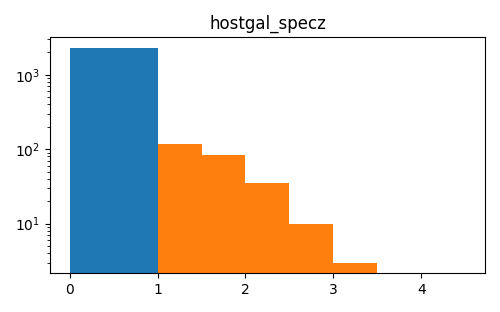

In [142]:
# galactic vs. extragalactic
num = 1
plt.close(num)
fig, ax = plt.subplots(num=num, figsize=(5,5./1.6), tight_layout=True)

key = "hostgal_specz"
ax.hist(
    META[META[key]==0][key],
    bins = [0,1]
)
ax.hist(
    META[META[key]>0][key],
    bins = np.arange(1,5,0.5)
)

ax.set_title(key)
ax.set_yscale("log")